 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col='Date',infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
#Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [83]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_path, index_col='Date',infer_datetime_format=True, parse_dates=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [84]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [91]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

In [92]:
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [95]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/sp500_history.csv")
sp500_df= pd.read_csv(sp500_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [54]:
# Check Data Types
sp500_df['Close'].dtype

dtype('O')

In [55]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$","")

sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df["Close"]

<ipython-input-55-7f710f7d8dc1>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$","")


Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64

In [56]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [57]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)


In [58]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns=['S&P 500']
sp500_daily_returns.head()


,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [59]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_df,algo_returns_df,sp500_daily_returns],axis="columns", join="inner")
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

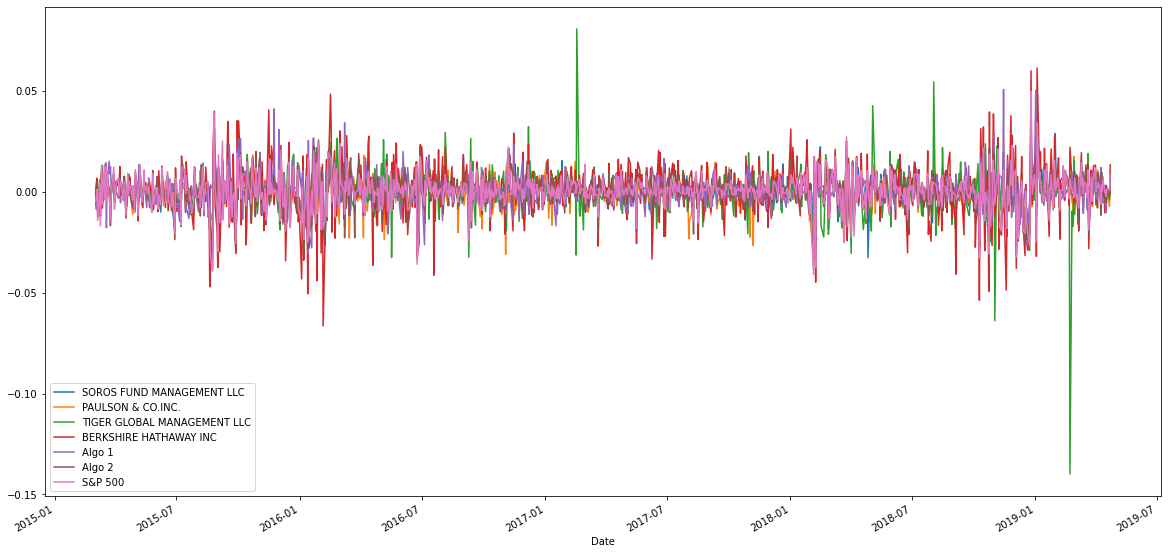

In [61]:
# Plot daily returns of all portfolios
#ax = whale_df.plot(figsize = (20,10))
#algo_returns_df.plot(ax=ax)
#sp500_daily_returns.plot(ax=ax)
combined_returns_df.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

In [16]:
# Calculate cumulative returns of all portfolios
combined_cumulative_returns = (1+combined_returns_df).cumprod()
combined_cumulative_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072
...,...,...,...,...,...,...,...
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.944990,1.267768,1.372945
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.924954,1.261140,1.369823
2019-04-18,1.159278,0.782678,0.858778,1.534716,1.923823,1.259590,1.371986


<AxesSubplot:xlabel='Date'>

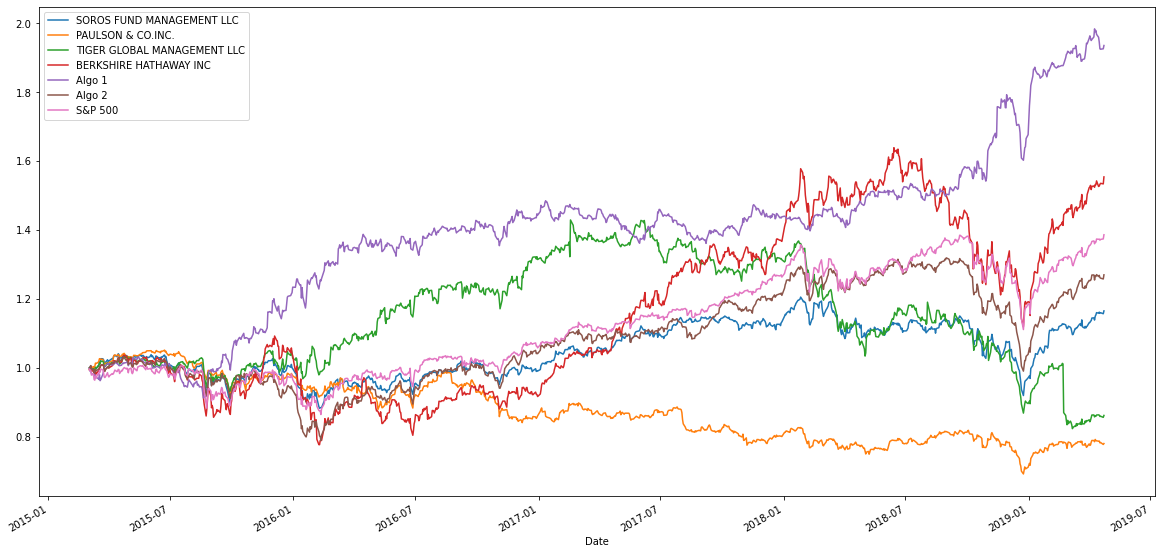

In [17]:
# Plot cumulative returns
combined_cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

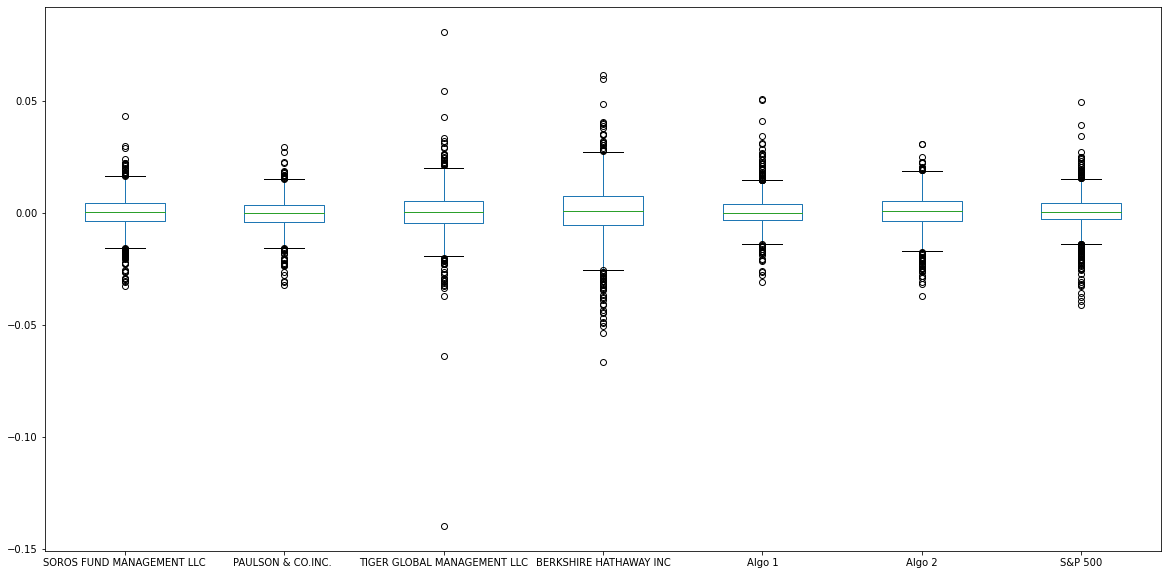

In [63]:
# Box plot to visually show risk
combined_returns_df.plot(kind = 'box', figsize=(20,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_returns_df.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [70]:
combined_returns_df.std() > combined_returns_df['S&P 500'].std()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [71]:
print("TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are riskier than the S&P 500")

TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
sp500_std_annualized = sp500_daily_returns.std() * np.sqrt(252)
print(sp500_std_annualized)
print("-----------------------")
whale_std_annualized = whale_df.std()* np.sqrt(252)
print(whale_std_annualized )
print("-----------------------")
algo_std_annualized = algo_returns_df.std()* np.sqrt(252)
print(algo_std_annualized )


S&P 500    0.128762
dtype: float64
-----------------------
SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64
-----------------------
Algo 1    0.126558
Algo 2    0.134401
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

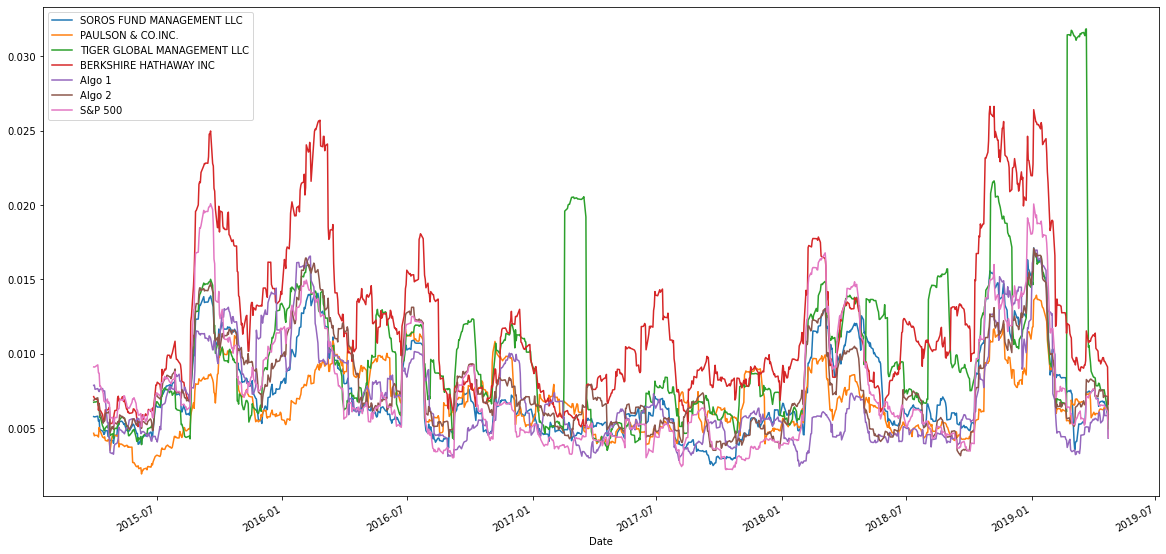

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_std = combined_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_std.plot(figsize=(20,10))

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
correlation = combined_returns_df.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

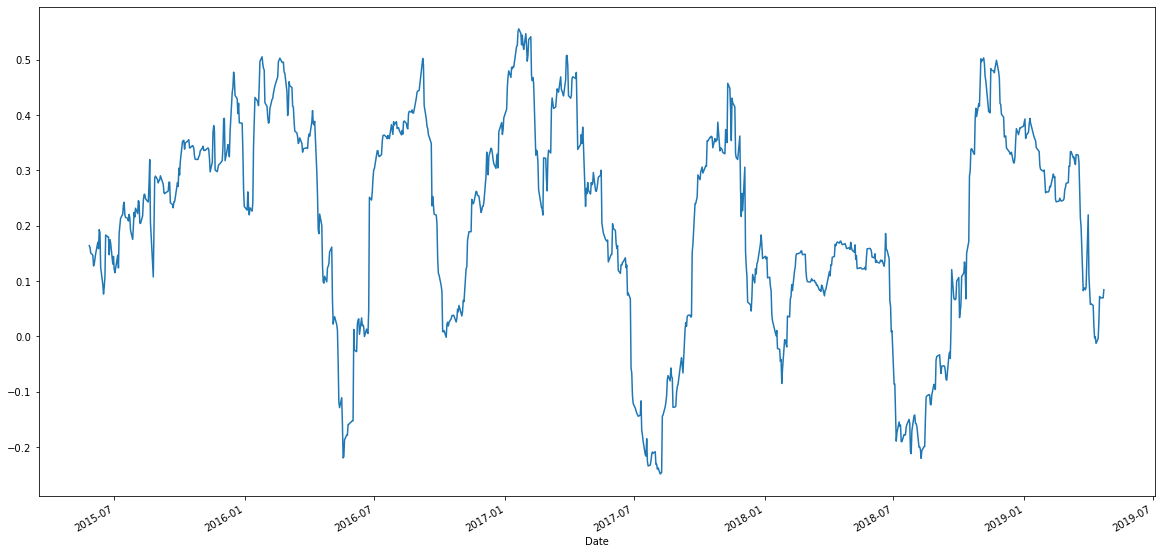

In [72]:
# Calculate covariance of a single portfolio
covariance = combined_returns_df['Algo 1'].rolling(window=60).cov(combined_returns_df['S&P 500'])
# Calculate variance of S&P 500
variance = combined_returns_df['S&P 500'].rolling(window=60).var()
# Computing beta
algo_1_beta = covariance / variance
# Plot beta trend
algo_1_beta.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

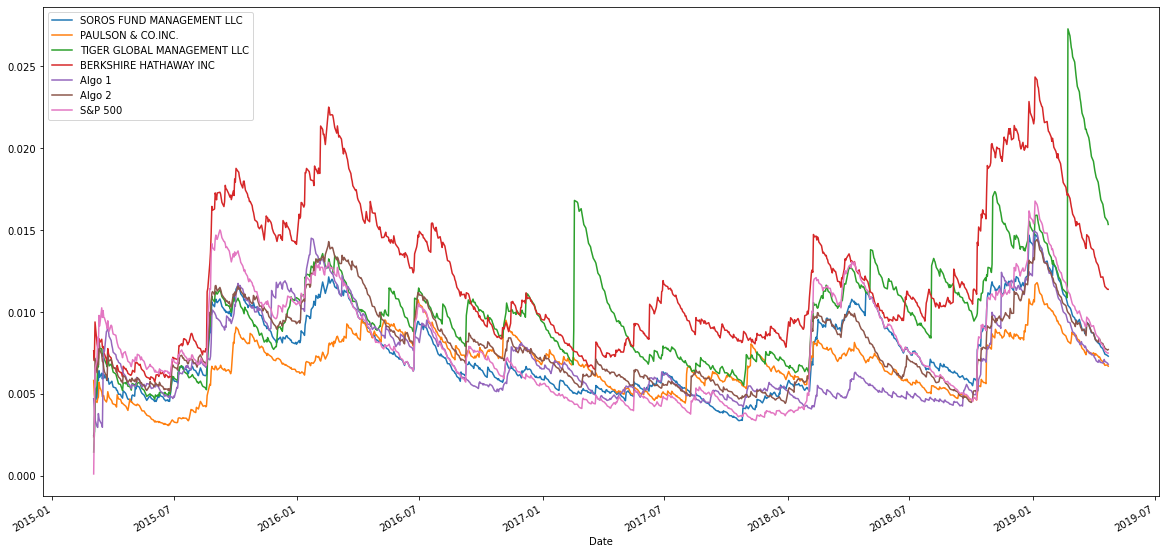

In [75]:
# Use `ewm` to calculate the rolling window
combined_returns_df.ewm(halflife=21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
combined_returns_sharpe_ratio = combined_returns_df.mean()/combined_returns_df.std() * np.sqrt(252)
combined_returns_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:>

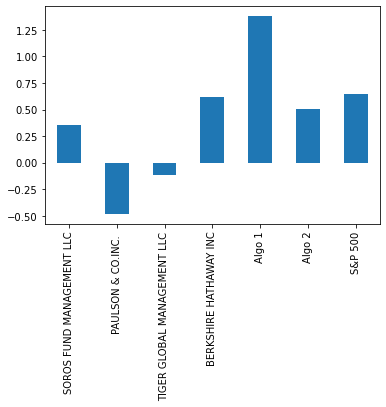

In [27]:
# Visualize the sharpe ratios as a bar plot
combined_returns_sharpe_ratio.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---
Harold's Algo 1 strategy has a sharpe ratio of 1.38 which is more than double that of the S&P 500's sharpe ratio of 0.65. While both standard deviations (amount of risk) are similar at 1.27 and 1.29 respectively, we can conclude that investing in Harold's Algo 1 strategy would reap a higher reward per given amount of risk compared to investing in the S&P 500. This conclusions can also be supported by comparing Algo 1's cumulative return and the market's cumulative return as Algo 1 had a cumulative return of 1.93 between the dates of 03-03-2015 and 04-23-2019 where as the market had a cumulative return of 1.37 between the same time period. 

Algo 2 on the other hand did not return a sharpe ratio larger than that of the S&P 500, nor did the cumulative returns outperform that of the market within the periods of 03-03-2015 and 04-23-2019.

Comparing Harold's strategies with the whales portfolios, a similar conclusion can be made about Harold's Algo 1 strategy. Algo 1's sharpe ratio was significantly higher than that of the whales portfolios and Algo 1's cumulative returns also outperformed that of the whales portfolios. 

The data also shows that Harold's Algo 2 strategy has a higher sharpe ratio and cumulative return than Tiger Global Management, Paulson & Co, and Soros Fund Management where Tiger Global and Paulson & Co returned a negative sharpe ratio as well as a cumulative return below 1.0. This tells us that an investment allocated to either Tiger Global or Paulson & Co on 03-03-2015 would result in a negative return by 04-23-2019. 

Algo 2 however did not outperform Berkshire Hathaway's portfolio as Berkshire's Sharpe ratio and cumulative return were both higher than that of Algo 2's. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
aapl_path = Path('Resources/aapl_historical.csv')
aapl_data = pd.read_csv(aapl_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
aapl_data.sort_index(inplace=True)
aapl_data.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [29]:
# Reading data from 2nd stock
cost_path = Path('Resources/cost_historical.csv')
cost_data = pd.read_csv(cost_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
cost_data.sort_index(inplace=True)
cost_data.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [30]:
# Reading data from 3rd stock
goog_path = Path('Resources/goog_historical.csv')
goog_data = pd.read_csv(goog_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
goog_data.sort_index(inplace=True)
goog_data.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [31]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([aapl_data,cost_data,goog_data],axis='rows', join='inner')
combined_df = combined_df.reset_index() 
combined_df = combined_df.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
combined_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [32]:
# Calculate daily returns
combined_returns = combined_df.pct_change().dropna()

# Display sample data
combined_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = combined_returns.dot(weights)
# Display sample data
my_portfolio_returns

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame
joined_df = pd.concat([my_portfolio_returns,combined_returns_df],axis='columns', join='inner').dropna()
joined_df = joined_df.rename(columns= {
    0 : "My Portfolio"
})
joined_df

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.001217,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [35]:
# Calculate the annualized `std`
joined_annualized_std = joined_df.std() * np.sqrt(252)
joined_annualized_std

My Portfolio                   0.211496
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

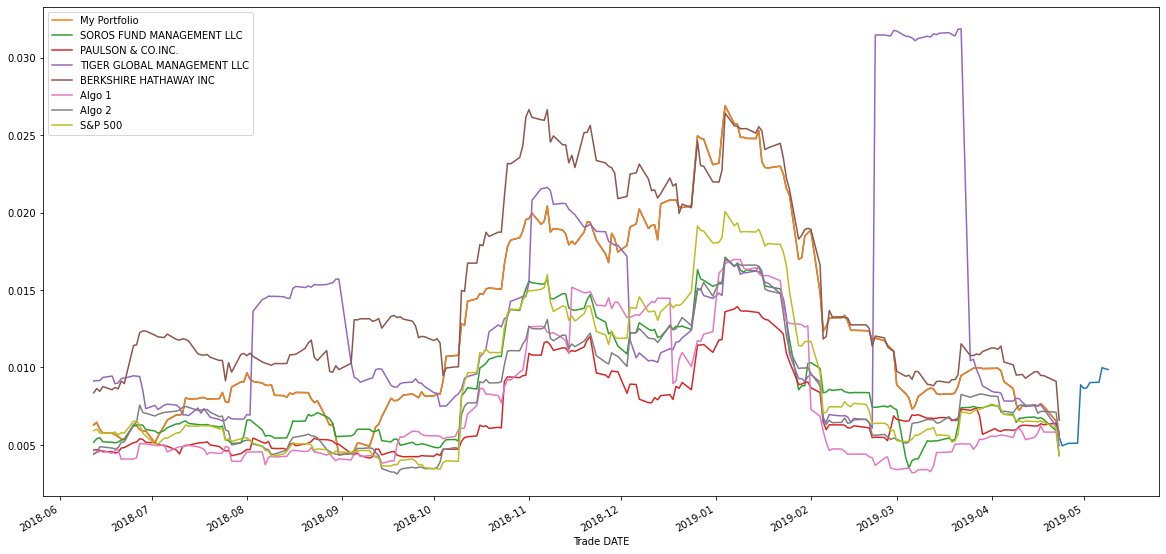

In [36]:
# Calculate rolling standard deviation andlot rolling standard deviation
ax = my_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10))
joined_df.rolling(window=21).std().plot(ax=ax)


### Calculate and plot the correlation

<AxesSubplot:>

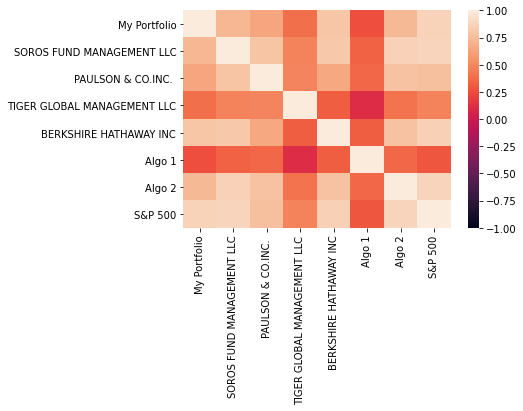

In [37]:
# Calculate and plot the correlation
correlation_joined_df=joined_df.corr()
sns.heatmap(correlation_joined_df, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

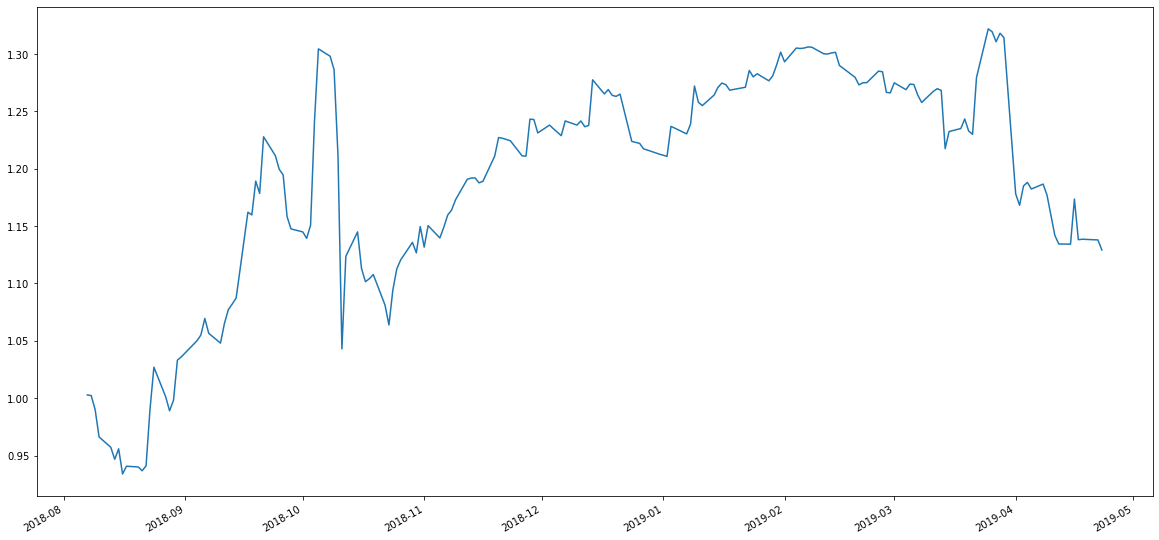

In [46]:
# Calculate
covariance_my_portfolio = joined_df['My Portfolio'].rolling(window=60).cov(joined_df["S&P 500"])
variance_my_portfolio = joined_df["S&P 500"].rolling(window=60).var()
beta_my_portfolio = covariance_my_portfolio / variance_my_portfolio
beta_my_portfolio.dropna()
beta_my_portfolio.plot(figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualzied Sharpe Ratios
joined_df_sharpe_ratio = joined_df.mean()/joined_df.std() * np.sqrt(252)
joined_df_sharpe_ratio

My Portfolio                   0.933123
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
dtype: float64

<AxesSubplot:>

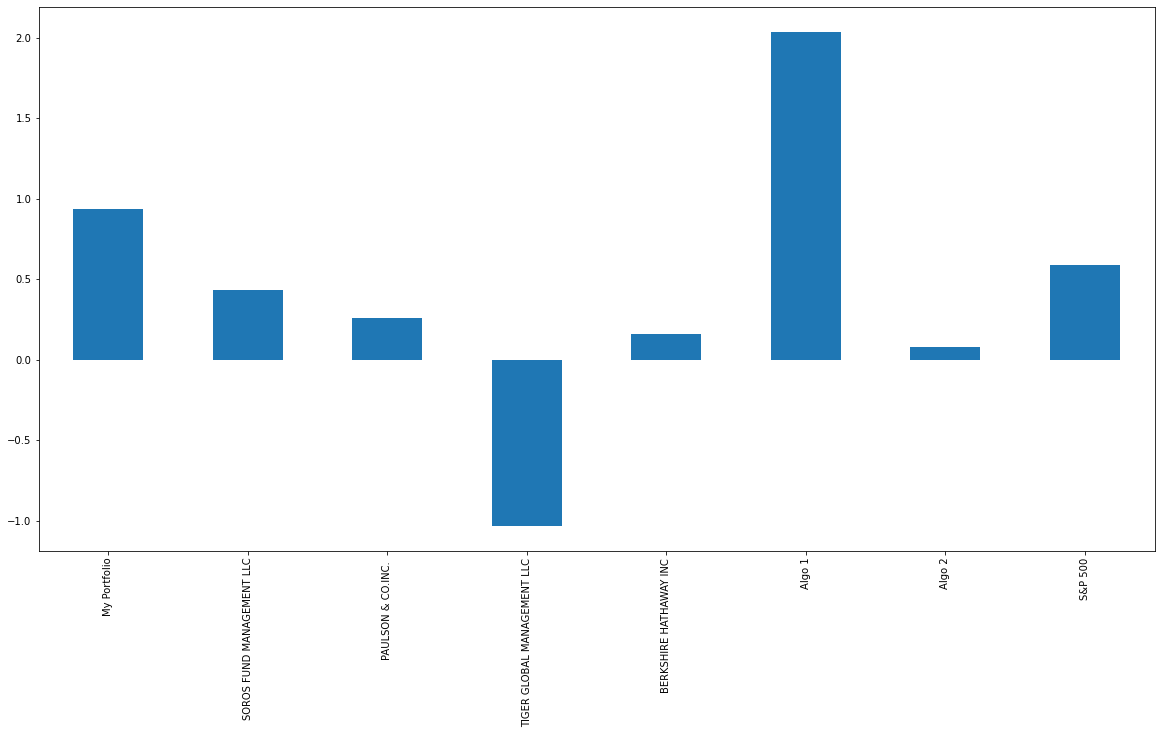

In [97]:
# Visualize the sharpe ratios as a bar plot
joined_df_sharpe_ratio.plot(kind='bar', figsize=(20,10))

### How does your portfolio do?

Write your answer here!

Between 2018-05 and 2019-08 we can see that my portfolio would reap a higher reward given the amount of risk given that it's sharpe ratio is higher then the market's and all other portfolis with the execption of Harold's Algo 1 portfolio. It is also worth noting that my portfolio appears to be most closely correlated to the S&P 500 based on the heatmap, which is not surprising since the total market cap of AAPL, GOOG, and COST combined makes up about 17% of the S&P 500's $33 trillion total market cap. 